<a href="https://colab.research.google.com/github/kush450629/ME421_GROUP_A1/blob/main/Vibration/ME421_E20021_Vibrations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Derivation of Mode Shapes and Linear Operator for Pinned-Free Beam

### 1. Boundary Conditions – Pinned-Free Beam

Consider a uniform beam of length $L$ with the following support conditions:

- **Pinned end (x = 0):**
  - Displacement is fixed: $w(0,t) = 0$
  - Bending moment is zero: $EI \frac{\partial^2 w}{\partial x^2}(0,t) = 0$  ⇒  $w''(0,t) = 0$

- **Free end (x = L):**
  - Bending moment is zero: $w''(L,t) = 0$
  - Shear force is zero: $EI \frac{\partial^3 w}{\partial x^3}(L,t) = 0$  ⇒  $w'''(L,t) = 0$

### 2. Governing Equation and Linear Operator

The equation of motion for free transverse vibration (no axial load) is:

$$
\rho A \frac{\partial^2 w}{\partial t^2} + EI \frac{\partial^4 w}{\partial x^4} = q(x,t)
$$

For free vibration ($q = 0$), we define the spatial differential operator $H$ as:

$$
H = \frac{EI}{\rho A} \frac{\partial^4}{\partial x^4}
$$

This gives the compact form:

$$
\frac{\partial^2 w}{\partial t^2} + H w = 0
$$

### 3. Separation of Variables – Eigenvalue Problem

Assume a time-harmonic solution:

$$
w(x,t) = \phi(x) \, e^{i\omega t}
$$

Substituting yields the eigenvalue problem:

$$
H \phi = \omega^2 \phi \quad \text{or} \quad \frac{d^4 \phi}{dx^4} = \beta^4 \phi
$$

where we introduced the wavenumber parameter:

$$
\beta^4 = \frac{\rho A \omega^2}{EI} \qquad \Rightarrow \qquad \omega = \beta^2 \sqrt{\frac{EI}{\rho A}}
$$

The general solution is:

$$
\phi(x) = A \sin(\beta x) + B \cos(\beta x) + C \sinh(\beta x) + D \cosh(\beta x)
$$

### 4. Applying Pinned Boundary Conditions (x = 0)

1. $\phi(0) = 0$  
   $\implies B + D = 0 \quad \Rightarrow \quad D = -B$

2. $\phi''(0) = 0$  
   $\phi''(x) = \beta^2 \bigl(-A\sin(\beta x) - B\cos(\beta x) + C\sinh(\beta x) + D\cosh(\beta x)\bigr)$  
   $\phi''(0) = \beta^2 (-B + D) = 0 \quad \Rightarrow \quad -B - B = 0 \quad \Rightarrow \quad B = 0$  
   $\Rightarrow D = 0$

Thus the mode shape reduces to:

$$
\phi(x) = A \sin(\beta x) + C \sinh(\beta x)
$$

### 5. Free-end Conditions (x = L) → Frequency Equation

Apply the two conditions at $x = L$:

**a) Zero moment:**

$$
\phi''(L) = \beta^2 \bigl( -A \sin(\beta L) + C \sinh(\beta L) \bigr) = 0
$$

$$
A \sin(\beta L) = C \sinh(\beta L) \quad \Rightarrow \quad C = A \frac{\sin(\beta L)}{\sinh(\beta L)}
$$

**b) Zero shear:**

$$
\phi'''(L) = \beta^3 \bigl( -A \cos(\beta L) + C \cosh(\beta L) \bigr) = 0
$$

Substitute $C$:

$$
-A \cos(\beta L) + A \frac{\sin(\beta L)}{\sinh(\beta L)} \cosh(\beta L) = 0
$$

$$
\cos(\beta L) = \frac{\sin(\beta L) \cosh(\beta L)}{\sinh(\beta L)}
$$

Rearranging gives the well-known **characteristic equation** for the pinned-free beam:

$$
\tan(\beta L) = \tanh(\beta L)
$$

### 6. Mode Shape Expression

The $k$-th eigenfunction (mode shape) can be written as:

$$
\phi_k(x) = \sin(\beta_k x) + \frac{\sin(\beta_k L)}{\sinh(\beta_k L)} \sinh(\beta_k x)
$$

(Amplitude scaling factor is arbitrary and usually normalized later according to mass or other criteria.)

### 7. First Few Roots (approximate values of $\beta_k L$)

- Mode 1: $\beta_1 L \approx 3.9266$
- Mode 2: $\beta_2 L \approx 7.0686$
- Mode 3: $\beta_3 L \approx 10.2102$
- (Higher modes approach $(2k-1)\pi/2$)

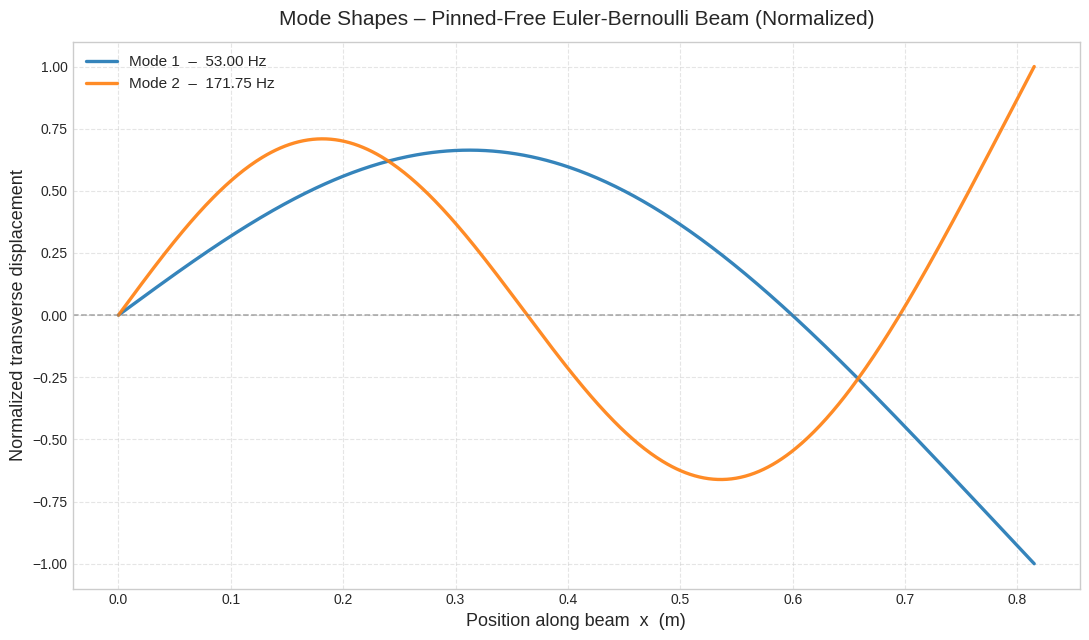


Computed eigenvalues (βₖ L) and natural frequencies:
───────────────────────────────────────────────
Mode  1 :   βL =   3.9266    →    f =  53.00 Hz
Mode  2 :   βL =   7.0686    →    f = 171.75 Hz


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq

# ─── 1. Beam Physical & Geometric Properties ────────────────────────────────
length          = 0.815          # total length [m]
total_mass      = 1.65           # total mass [kg]
young_modulus   = 2.0e11         # E [Pa]
width           = 0.025          # b [m]
thickness       = 0.010          # h [m]

cross_section_area = width * thickness
moment_of_inertia  = (width * thickness**3) / 12
mass_per_unit_length = total_mass / length
flexural_rigidity = young_modulus * moment_of_inertia   # EI

# ─── 2. Characteristic Equation for Pinned-Free Beam ────────────────────────
def pinned_free_freq_eq(lam):
    """ Characteristic function: sin(λ)cosh(λ) − cos(λ)sinh(λ) = 0 """
    return np.sin(lam) * np.cosh(lam) - np.cos(lam) * np.sinh(lam)

# ─── 3. Locate first n eigenvalues (βL values) ──────────────────────────────
def locate_eigenvalues(num_modes=2):
    eigenvalues = []
    # Coarse search grid to find sign-change intervals
    grid = np.linspace(0.5, 15.0, 1200)
    f_vals = pinned_free_freq_eq(grid)

    for i in range(len(grid)-1):
        if f_vals[i] * f_vals[i+1] < 0:           # sign change
            root = brentq(pinned_free_freq_eq, grid[i], grid[i+1])
            eigenvalues.append(root)
            if len(eigenvalues) >= num_modes:
                break

    return np.array(eigenvalues)

lambda_values = locate_eigenvalues(2)

# ─── 4. Mode shape function (arbitrary amplitude) ───────────────────────────
def mode_shape_function(x, lambda_k, L):
    beta = lambda_k / L
    # From moment condition at free end:  σ = sin(βL) / sinh(βL)
    ratio = np.sin(lambda_k) / np.sinh(lambda_k)
    return np.sin(beta * x) + ratio * np.sinh(beta * x)

# ─── 5. Generate plots ──────────────────────────────────────────────────────
x_points = np.linspace(0, length, 600)

plt.figure(figsize=(11, 6.5))
plt.style.use('seaborn-v0_8-whitegrid')   # optional: cleaner look

for mode_idx, lam in enumerate(lambda_values, start=1):
    psi_raw = mode_shape_function(x_points, lam, length)

    # Normalize: peak absolute value = 1
    psi_norm = psi_raw / np.max(np.abs(psi_raw))

    # Natural frequency
    beta = lam / length
    omega_rad = beta**2 * np.sqrt(flexural_rigidity / mass_per_unit_length)
    f_hz = omega_rad / (2 * np.pi)

    plt.plot(x_points, psi_norm,
             label=f'Mode {mode_idx}  –  {f_hz:.2f} Hz',
             linewidth=2.4, alpha=0.9)

# ─── Plot cosmetics ─────────────────────────────────────────────────────────
plt.axhline(y=0, color='gray', lw=1.1, ls='--', alpha=0.7)
plt.title('Mode Shapes – Pinned-Free Euler-Bernoulli Beam (Normalized)',
          fontsize=15, pad=12)
plt.xlabel('Position along beam  x  (m)', fontsize=13)
plt.ylabel('Normalized transverse displacement', fontsize=13)
plt.legend(fontsize=11, loc='upper left', framealpha=0.95)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# ─── Summary output ─────────────────────────────────────────────────────────
print("\nComputed eigenvalues (βₖ L) and natural frequencies:")
print("───────────────────────────────────────────────")
for k, lam in enumerate(lambda_values, 1):
    beta = lam / length
    omega = beta**2 * np.sqrt(flexural_rigidity / mass_per_unit_length)
    f = omega / (2 * np.pi)
    print(f"Mode {k:2d} :   βL = {lam:8.4f}    →    f = {f:6.2f} Hz")